# CS331 - Spring 2021 - Phase 1 [15%]

*__Submission Guidelines:__*
- Naming convention for submission of this notebook is `groupXX_Phase1.ipynb` where XX needs to be replaced by your group number. For example: group 1 would rename their notebook to `group01_Phase1.ipynb`
- Only the group lead is supposed to make the submission
- All the cells <b>must</b> be run once before submission. If your submission's cells are not showing the results (plots etc.), marks wil be deducted
- Only the code written within this notebook will be considered while grading. No other files will be entertained
- You are advised to follow good programming practies including approriate variable naming and making use of logical comments 

The university honor code should be maintained. Any violation, if found, will result in disciplinary action. 


#### <b>Introduction</b> 
This is the first of the three phases of this offering's project. To give an overview of this phase, we will essentially be building everything from scratch. The dataset that we will be using for this project is Fashion_MNIST dataset. This dataset consists of 70,000 images of fashion/clothing items belonging to 10 different categories/classes. It has furhter been divided into 60,000 training images and 10,000 test images and each image is a 28*28 grayscale image (hence 1 color channel). It is recommended that you go through  [this link](https://www.kaggle.com/zalando-research/fashionmnist) to familiarize yourself with the dataset

You will begin by manually loading the dataset in this notebook (more instructions on this will follow) followed by from-scratch implementation of a Neural Netowrk (NN). Once done, you will have to tweak the hyperparameters (such as learning rate, number of epochs etc.) to get the best results for your NN's implementation

###### <b>You will strictly be using for-loops fort this phase's implementation of NN (unless specified otherwise in the sub-section)

###### Modification of the provided code without prior discussion with the TAs will result in a grade deduction</b>

---

###### <b>Side note</b>
The `plot_model` method will only work if you have the `pydot` python package installed along with [Graphviz](https://graphviz.gitlab.io/download/). If you do not wish to use this then simply comment out the import for `pydot`

###### <b>Need Help?</b>
If you need help, please refer to the course staff ASAP and do not wait till the last moment as they might not be available on very short notice close to deadlines

#### <b>Before You Begin</b>

Skeleton code is provided to get you started. The main methods that you need to implement correspond to the four steps of the training process of a NN which are as follows:
1. Initialize variables and initialize weights
2. Forward pass
3. Backward pass AKA Backpropogation
4. Weight Update AKA Gradient Descent

__Look for comments in the code to see where you are supposed to write your code__ 

A `fit` function is what combines the previous three functions and overall trains the network to __fit__ to the provided training examples. The provided `fit` methods requires all the four steps of the training process to be working correctly. The function has been setup in a way that it expects the above four methods to take particular inputs and return particular outputs. __You are supposed to work within this restriction__ 



__To see if your model is working correctly, you need to make sure that your model loss is going down during training__


In [138]:
# making all the necessary imports here

import numpy as np
import pandas as pd
import time
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from IPython.display import Image
import pydot
from tqdm import tqdm_notebook
import seaborn as sns
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from sklearn.datasets import make_moons
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from google.colab import drive
import glob
import cv2
import numba
from numba.core.errors import NumbaDeprecationWarning, NumbaPendingDeprecationWarning
from sklearn.metrics import accuracy_score

In [ ]:
# This fucntion will be used to plot the confusion matrix at the end of this notebook

def plot_confusion_matrix(conf_mat):
    classes = ['T-shirt/top','Trouser/pants','Pullover shirt','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
    df_cm = pd.DataFrame(conf_mat,classes,classes)
    plt.figure(figsize=(15,9))
    sns.set(font_scale=1.4)
    sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})
    plt.show()

class_labels = ['T-shirt/top','Trouser/pants','Pullover shirt','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [ ]:
# Enter group lead's roll number here. This will be used for plotting purposes

rollnumber = 23100088

#### __Read dataset__

Get paths for all the training and test images in the dataset and print the length of training and test paths' list. For this purpose you can use glob. You can have a look [here](https://www.geeksforgeeks.org/how-to-use-glob-function-to-find-files-recursively-in-python/) on how to use glob. The dataset that has been provided to you guys is a truncated version of the Fashion MNIST dataset (having 2000 training images and 1600 test images, only)

In [ ]:
# Mounting Google Drive here
drive.mount('/drive')

# Edit this address so that it points to the dataset's zipped file on your Google Drive
!unzip -o -q "/drive/MyDrive/dataset.zip" -d "/content/data/"

Mounted at /drive


In [52]:
classes = 10  # do not change this
X_train = None  # you must store the training images in this varaible 
y_train = None  # you must store the training images' labels in this varaible
X_test = None   # you must store the test images in this varaible
y_test = None   # you must store the test images' labels in this varaible

###### Code Here ######
'''Please note that you will have to extarct and one-hot encode the labels of the images for both y_train and y_test'''
test_data = []
train_data = []
test_label = []
train_label = []

for image in glob.glob('/content/data/test/*/*'):
  my_image = cv2.imread(image, 0)
  normalized_image = cv2.normalize(my_image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
  flatten_image = normalized_image.flatten()
  test_data.append(flatten_image)
  test_label.append(image.split("/")[4])
X_test = np.array(test_data)
# unique_elements, indices = np.unique(test_label, return_inverse=True)
# y_test = np.eye(unique_elements.shape[0])[indices]
y_test = np.zeros((1600, 10))
i = 0
for label in test_label:
  one_hot = [0, 0, 0, 0, 0, 0, 0, 0, 0 ,0]
  if label == "top":
    one_hot[0] = 1
    y_test[i] = one_hot
    i += 1
  elif label == "pants":
    one_hot[1] = 1
    y_test[i] = one_hot
    i += 1
  elif label == "pullovershirt":
    one_hot[2] = 1
    y_test[i] = one_hot
    i += 1
  elif label == "dress":
    one_hot[3] = 1
    y_test[i] = one_hot
    i += 1
  elif label == "coat":
    one_hot[4] = 1
    y_test[i] = one_hot
    i += 1
  elif label == "sandal":
    one_hot[5] = 1
    y_test[i] = one_hot
    i += 1
  elif label == "shirt":
    one_hot[6] = 1
    y_test[i] = one_hot
    i += 1
  elif label == "sneaker":
    one_hot[7] = 1
    y_test[i] = one_hot
    i += 1
  elif label == "bag":
    one_hot[8] = 1
    y_test[i] = one_hot
    i += 1
  elif label == "anklefoot":
    one_hot[9] = 1
    y_test[i] = one_hot
    i += 1
for image in glob.glob('/content/data/train/*/*'):
  my_image = cv2.imread(image, 0)
  normalized_image = cv2.normalize(my_image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
  flatten_image = normalized_image.flatten()
  train_data.append(flatten_image)
  train_label.append(image.split("/")[4])
X_train = np.array(train_data)
# unique_elements, indices = np.unique(train_label, return_inverse=True)
# y_train = np.eye(unique_elements.shape[0])[indices]
y_train = np.zeros((2000, 10))
i = 0
for label in train_label:
  one_hot = [0, 0, 0, 0, 0, 0, 0, 0, 0 ,0]
  if label == "top":
    one_hot[0] = 1
    y_train[i] = one_hot
    i += 1
  elif label == "pants":
    one_hot[1] = 1
    y_train[i] = one_hot
    i += 1
  elif label == "pullovershirt":
    one_hot[2] = 1
    y_train[i] = one_hot
    i += 1
  elif label == "dress":
    one_hot[3] = 1
    y_train[i] = one_hot
    i += 1
  elif label == "coat":
    one_hot[4] = 1
    y_train[i] = one_hot
    i += 1
  elif label == "sandal":
    one_hot[5] = 1
    y_train[i] = one_hot
    i += 1
  elif label == "shirt":
    one_hot[6] = 1
    y_train[i] = one_hot
    i += 1
  elif label == "sneaker":
    one_hot[7] = 1
    y_train[i] = one_hot
    i += 1
  elif label == "bag":
    one_hot[8] = 1
    y_train[i] = one_hot
    i += 1
  elif label == "anklefoot":
    one_hot[9] = 1
    y_train[i] = one_hot
    i += 1

print("Number of training sample: ", len(X_train))  # You can change len(X_train) based on your implementation such that total number of training samples is printed
print("Number of testing sample: ", len(X_test))    # You can change len(X_test) based on your implementation such that total number of test samples is printed

Number of training sample:  2000
Number of testing sample:  1600


#### __NN Implementation__
Your implementation of NN needs to use the `sigmoid` activation function for the hidden layer(s) and the `softmax` activation function for the output layer. The NN model you will be creating here will consits of only three layers: 1 input layer, 1 hidden layer and 1 output layer

In [168]:
class NeuralNetwork():
    
    @staticmethod
    def cross_entropy_loss(y_pred, y_true):
        ###### Code Here ######
        entropy_loss = -(y_true * np.log(y_pred)).sum()
        return entropy_loss
    
    @staticmethod
    def accuracy(y_pred, y_true):
        ###### Code Here ######
        accuracy = np.sum(y_pred == y_true)
        return accuracy/y_pred.shape[0]
    
    @staticmethod
    def softmax(x):
        ###### Code Here ######
        take_exponent = np.exp(x)
        soft_max = take_exponent / take_exponent.sum(axis=1, keepdims=True)
        return soft_max
    
    @staticmethod
    def sigmoid(x):
        ###### Code Here ######
        sigmoid_function = 1/(1 + np.exp(-x))
        return sigmoid_function
    
    def __init__(self, input_size, hidden_nodes, output_size):
        '''Creates a Feed-Forward Neural Network.
        The parameters represent the number of nodes in each layer (total 3). 
        Look at the inputs to the function'''
        
        self.num_layers = 3
        self.input_shape = input_size
        self.hidden_shape = hidden_nodes
        self.output_shape = output_size
        
        self.weights_ = []
        self.biases_ = []
        self.__init_weights()
    
    def __init_weights(self):
        '''Initializes all weights based on standard normal distribution and all biases to 0.'''
        
        ###### Code Here (Replace 'None' by appropriate values/varaibles) ######
        W_h = np.random.normal(size=(self.input_shape, self.hidden_shape))
        b_h = np.zeros(shape=(self.hidden_shape,))

        W_o = np.random.normal(size=(self.hidden_shape, self.output_shape))
        b_o = np.zeros(shape=(self.output_shape,))
        
        # self.weights_ becomes a list of np.arrays. 0th index has W_h and 1st index has W_o
        self.weights_.append(W_h)  
        self.weights_.append(W_o)  

        # self.biases_ becomes a list of np.arrays. 0th index has b_h and 1st index has b_o
        self.biases_.append(b_h)
        self.biases_.append(b_o)

    @numba.jit
    def matrix_sum(self, matrix, axis=None):
      '''
      Substitute for np.sum(a, axis=whatever)
      '''
      if axis == 1:
        row = matrix.shape[0]
        column = matrix.shape[1]
        result = []
        k = 0
        for i in range(row):
          add = 0
          for j in range(column):
            add += matrix[i][j]
          result.append(add)
          k += 1
      else:
        row = matrix.shape[0]
        column = matrix.shape[1]
        result = []
        k = 0
        for i in range(column):
          add = 0
          for j in range(row):
            add += matrix[j][i]
          result.append(add)
          k += 1
      return np.array(result)
    
    @numba.jit
    def matrix_addition(self, matrix_one, matrix_two):
      '''
      Substitute for matrix_one + matrix_two
      '''
      row = matrix_one.shape[0]
      column = matrix_one.shape[1]
      result = np.zeros((row, column))

      for i in range(row):
        for j in range(column):
          result[i][j] = matrix_one[i][j] + matrix_two[i][j]
      return result

    @numba.jit
    def matrix_subtraction(self, matrix_one, matrix_two):
      '''
      Substitute for matrix_one - matrix_two
      '''
      row = matrix_one.shape[0]
      column = matrix_one.shape[1]
      result = np.zeros((row, column))

      for i in range(row):
        for j in range(column):
          result[i][j] = matrix_one[i][j] - matrix_two[i][j]
      return result

    @numba.jit
    def matrix_elementwise(self, matrix_one, matrix_two):
      '''
      Substitute for np.multiply(a, b)
      '''
      row = matrix_one.shape[0]
      column = matrix_one.shape[1]
      result = np.zeros((row, column))

      for i in range(row):
        for j in range(column):
          result[i][j] = matrix_one[i][j] * matrix_two[i][j]
      return result
    
    @numba.jit
    def scalar_subtract(self, matrix, constant):
      '''
      Substitute for k - matrix
      '''
      row = matrix.shape[0]
      column = matrix.shape[1]
      result = np.zeros((row, column))

      for i in range(row):
        for j in range(column):
          result[i][j] = constant - matrix[i][j]
      return result

    @numba.jit
    def scalar_multiply(self, matrix, constant):
      '''
      Substitute for matrix * k
      '''
      row = matrix.shape[0]
      column = matrix.shape[1]
      result = np.zeros((row, column))

      for i in range(row):
        for j in range(column):
          result[i][j] = matrix[i][j] * constant
      return result

    @numba.jit
    def matrix_multiplication(self, matrix_one, matrix_two):
      '''
      Substitute for np.matmul(a, b) or np.dot(a, b)
      '''
      row_one = matrix_one.shape[0]
      column_one = matrix_one.shape[1]
      row_two = matrix_two.shape[0]
      column_two = matrix_two.shape[1]
      result = np.zeros((row_one, column_two))

      for i in range(row_one):
        for j in range(column_two):
          for k in range(column_one):
            result[i][j] += matrix_one[i][k] * matrix_two[k][j]
      return result

    def forward_pass(self, input_data):
        '''Executes the feed forward algorithm.
        "input_data" is the input to the network in row-major form
        Returns "activations", which is a list of all layer outputs (excluding input layer of course)'''

        ###### Code Here ######
        '''
        Activations is the matrix product of input data to the layer and the weights for that layer and sum of the reuslt and the biases of that layer
                      a = (input (matrix product) weights) + biases
        Then we squish the function to fit in the 0 to 1 range
                      z = sigmoid(a)
        Then we forward propogate the activations of the hidden layer to the output layer
        '''
        activations = self.matrix_multiplication(input_data, self.weights_[0])
        for i in range(len(self.biases_[0])):
          activations[0][i] += self.biases_[0][i]
        hidden_layer_activations = self.sigmoid(activations)
        activations = self.matrix_multiplication(hidden_layer_activations, self.weights_[1])
        for i in range(len(self.biases_[1])):
          activations[0][i] += self.biases_[1][i] 
        output_layer_activations = self.softmax(activations)
        return [hidden_layer_activations, output_layer_activations] 

    def backward_pass(self, targets, layer_activations):
        '''Executes the backpropogation algorithm.
        "targets" is the ground truth/labels
        "layer_activations" are the return value of the forward pass step
        Returns "deltas", which is a list containing weight update values for all layers (excluding the input layer of course)'''
        
        ###### Code Here ######
        '''
        DELTA CALCULATION FOR THE OUTPUT LAYER
        Since we are using sofmax for the output layer, we use cross entropy loss function to find the delta in this layer
        After derivatives and things the delta turns out to be:
                  dError_dInput = layer_activations[1] - targets
        '''
        deltas = []
        dError_dOutput = self.matrix_subtraction(layer_activations[1], targets)
        dError_dInput = dError_dOutput
        deltas.append(dError_dInput)

        '''
        DELTA CALCULATION FOR THE HIDDEN LAYER
        We need to propogate the delta calculated above backwards by multiplying it with the output weights
        dError_dOutput is the propogated delta from the output layer which is:
                  dError_dOutput = Output_delta (Matrix multiplied with) transpose(output_weights)
        
        dOutput_dInput is the derivative of the sigmoid function which is:
                  S(x) = 1/(1 + e^-x)
        so the derivative of this function with respect to the input is:
                  S'(x) = x * (1 - x)
        
        dError_dInput is the delta:
                  dError_dOutput * dOutput_dInput
        '''
        dError_dOutput = self.matrix_multiplication(dError_dInput, self.weights_[1].T)     
        dOutput_dInput = self.matrix_elementwise(layer_activations[0], self.scalar_subtract(layer_activations[0], 1))
        dError_dInput = self.matrix_elementwise(dOutput_dInput, dError_dOutput)
        deltas.append(dError_dInput)
        
        return deltas
    
    def weight_update(self, deltas, layer_inputs, lr):
        '''Executes the gradient descent algorithm.
        "deltas" is return value of the backward pass step
        "layer_inputs" is a list containing the inputs for all layers (including the input layer)
        "lr" is the learning rate'''
        
        ###### Code Here ######
        '''
        WEIGHT UPDATE FOR THE OUTPUT LAYER
        dInput_dWeight is the input to the layer for which we are updating the weights in this case the inputs to the output layer
                    dInput_dWeight = input to the output layer
        
        dError_dWeight is the matrix product of the delta and dInput_dWeight:
                    delta = dErorr_dInput
                    dError_dWeight = dError_dInput * dInput_dWeight
        Now we have found the error in the weight

        Error in the bias is just the sum across the row of delta
        '''
        dInput_dWeight = layer_inputs[0]
        dError_dweight = self.matrix_multiplication(dInput_dWeight.T, deltas[1])
        self.weights_[0] = self.matrix_subtraction(self.weights_[0], self.scalar_multiply(dError_dweight, lr))
        temp = lr * self.matrix_sum(deltas[1], 0)
        for i in range(len(self.biases_[0])):
          self.biases_[0][i] -= temp[i]

        '''
        WEIGHT UPDATE FOR THE HIDDEN LAYER
        dInput_dWeight is the input to the layer for which we are updating the weights in this case the inputs to the hidden layer
                    dInput_dWeight = input to the hidden layer
        
        dError_dWeight is the matrix product of the delta and dInput_dWeight:
                    delta = dErorr_dInput
                    dError_dWeight = dError_dInput * dInput_dWeight
        Now we have found the error in the weight

        Error in the bias is just the sum across the row of delta
        '''
        dInput_dWeight = layer_inputs[1]
        dError_dweight = self.matrix_multiplication(layer_inputs[1].T, deltas[0])
        self.weights_[1] = self.matrix_subtraction(self.weights_[1], self.scalar_multiply(dError_dweight, lr))
        temp = lr * self.matrix_sum(deltas[0], 0)
        for i in range(len(self.biases_[1])):
          self.biases_[1][i] -= temp[i]

    
    ###### Do Not Change Anything Below this line in This Cell ######
    
    def fit(self, Xs, Ys, epochs, lr=1e-3):
            history = []
            for epoch in tqdm_notebook(range(epochs)):
                num_samples = Xs.shape[0]
                for i in range(num_samples):

                    sample_input = Xs[i,:].reshape((1,self.input_shape))
                    sample_target = Ys[i,:].reshape((1,self.output_shape))
                    
                    activations = self.forward_pass(sample_input)   # Call forward_pass function 
                    deltas = self.backward_pass(sample_target, activations)    # Call backward_pass function 
                    layer_inputs = [sample_input] + activations[:-1]
                    
                    # Call weight_update function 
                    self.weight_update(deltas, layer_inputs, lr)
                
                preds = self.predict(Xs)   # Call predict function 

                current_loss = self.cross_entropy_loss(preds, Ys)
                
                if  epoch==epochs-1:
                  confusion_mat=confusion_matrix(Ys.argmax(axis=1), preds.argmax(axis=1),labels=np.arange(10))  
                  plot_confusion_matrix(confusion_mat)
                  report = classification_report(Ys, np_utils.to_categorical(preds.argmax(axis=1),num_classes=classes), target_names=class_labels)
                  print(report)
                history.append(current_loss)
            return history
    
    def predict(self, Xs):
        '''Returns the model predictions (output of the last layer) for the given "Xs".'''
        predictions = []
        num_samples = Xs.shape[0]
        for i in range(num_samples):
            sample = Xs[i,:].reshape((1,self.input_shape))
            sample_prediction = self.forward_pass(sample)[-1]
            predictions.append(sample_prediction.reshape((self.output_shape,)))
        return np.array(predictions)
  
    def evaluate(self, Xs, Ys):
        '''Returns appropriate metrics for the task, calculated on the dataset passed to this method.'''
        pred = self.predict(Xs)
        return self.cross_entropy_loss(pred, Ys), self.accuracy(pred.argmax(axis=1), Ys.argmax(axis=1))
    
    def plot_model(self, filename):
        '''Provide the "filename" as a string including file extension. Creates an image showing the model as a graph.'''
        graph = pydot.Dot(graph_type='digraph')
        graph.set_rankdir('LR')
        graph.set_node_defaults(shape='circle', fontsize=0)
        nodes_per_layer = [self.input_shape, self.hidden_shape, self.output_shape]
        for i in range(self.num_layers-1):
            for n1 in range(nodes_per_layer[i]):
                for n2 in range(nodes_per_layer[i+1]):
                    edge = pydot.Edge(f'l{i}n{n1}', f'l{i+1}n{n2}')
                    graph.add_edge(edge)
        graph.write_png(filename)

In [178]:
# These are what we call the hyperparameters (a.k.a Black Magic). You need to research on them and tweak them to see what generates the best result for you 

INPUT_SIZE = 784      # must be an int, this number represents the numeber of nodes/neurons in the input layer of the network
HIDDEN_NODES = 400 # must be an int, this number represents the numeber of nodes/neurons in the only hidden layer of the network
OUTPUT_SIZE = 10    # must be an int, this number represents the numeber of nodes/neurons in the output layer of the network
EPOCHS = 100           # must be an int
LEARNING_RATE = 0.001

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:288: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


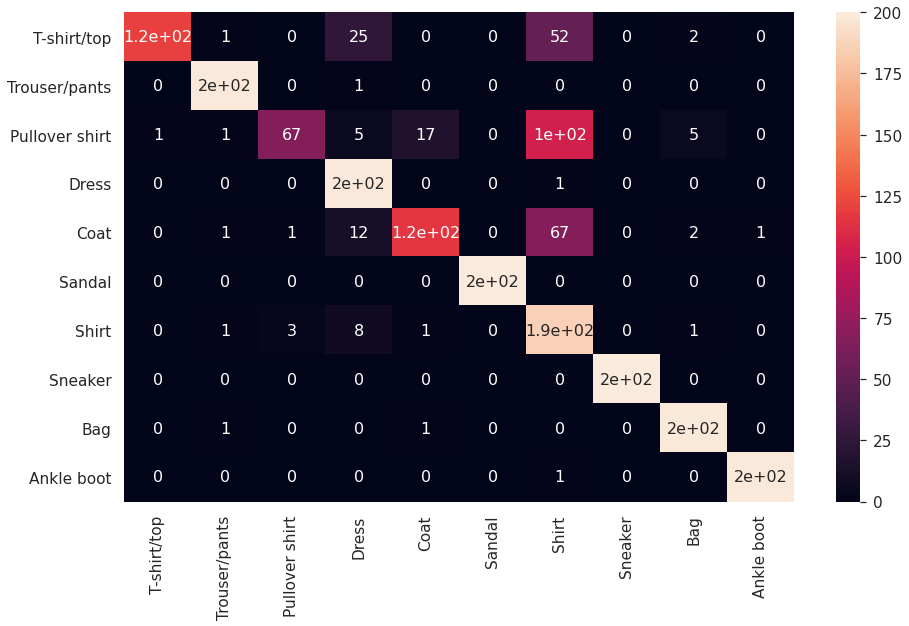

                precision    recall  f1-score   support

   T-shirt/top       0.99      0.60      0.75       200
 Trouser/pants       0.98      0.99      0.99       200
Pullover shirt       0.94      0.34      0.49       200
         Dress       0.80      0.99      0.88       200
          Coat       0.86      0.58      0.69       200
        Sandal       1.00      1.00      1.00       200
         Shirt       0.45      0.93      0.61       200
       Sneaker       1.00      1.00      1.00       200
           Bag       0.95      0.99      0.97       200
    Ankle boot       0.99      0.99      0.99       200

     micro avg       0.84      0.84      0.84      2000
     macro avg       0.90      0.84      0.84      2000
  weighted avg       0.90      0.84      0.84      2000
   samples avg       0.84      0.84      0.84      2000


Runtime of the algorithm is  1709.932  seconds


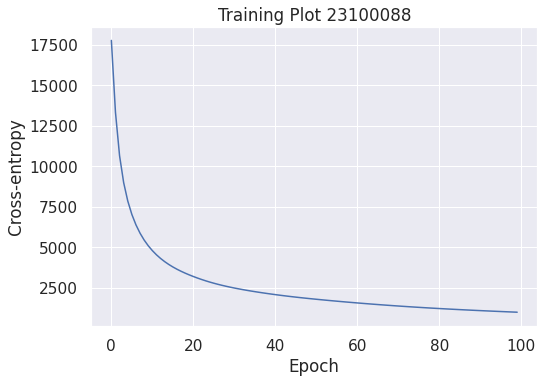

In [179]:
start = time.time()

nn = NeuralNetwork(input_size = INPUT_SIZE, hidden_nodes = HIDDEN_NODES, output_size = OUTPUT_SIZE)
history = nn.fit(X_train, y_train, epochs=EPOCHS, lr=LEARNING_RATE)
plt.plot(history);
plt.gca().set(xlabel='Epoch', ylabel='Cross-entropy', title='Training Plot {}'.format(rollnumber));
end = time.time()

print("Runtime of the algorithm is ", round((end - start),3)," seconds")

In [180]:
nn.evaluate(X_test, y_test)

(2761.1003988016128, 0.680625)